In [40]:
from qutip import*
from tcsim.system import*
from tcsim.visualization import plot_wigner, plot_char
from tcsim.gates import*
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [163]:
def squeezingStateOneStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = U_ideal_operator(u_1)*vac
    psi2 = V_ideal_operator(v_1)*psi1
    return [psi1, psi2]
disp = 3
uv1 = [ 1, -0.6]

psis = squeezingStateOneStep(uv1)

In [19]:
i_plus = (fock(2,0) + 1j*fock(2,1)).unit()
i_minus = (fock(2,0) - 1j*fock(2,1)).unit()

g_proj = fock(2,0) * fock(2,0).dag()
e_proj = fock(2,1) * fock(2,1).dag()

i_plus_proj = i_plus * i_plus.dag()
i_minus_proj = i_minus * i_minus.dag()

i_plus_proj_tensor = tensor(i_plus_proj, qeye(N))
i_minus_proj_tensor = tensor(i_minus_proj, qeye(N)) 
g_proj_tensor = tensor(g_proj, qeye(N))
e_proj_tensor = tensor(e_proj, qeye(N))

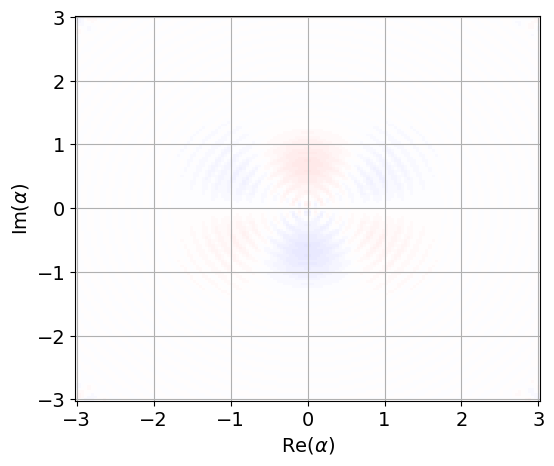

In [164]:


xvec = np.linspace(-3, 3, 150)
W1 = qt.wigner(i_plus_proj_tensor*psis[1].unit() ,xvec , xvec, g = 2 )
W2 = qt.wigner(i_minus_proj_tensor*psis[1].unit() ,xvec , xvec, g = 2 )

fig = plt.figure(figsize=(6, 5))

ax = fig.subplots()

im = ax.pcolormesh(
    xvec, xvec, W1-W2, cmap="seismic", vmin=-1, vmax=1
    )
ax.set_xlabel(r"Re$(\alpha)$")
ax.set_ylabel(r"Im$(\alpha)$")
ax.grid()
# ax.set_title(title)


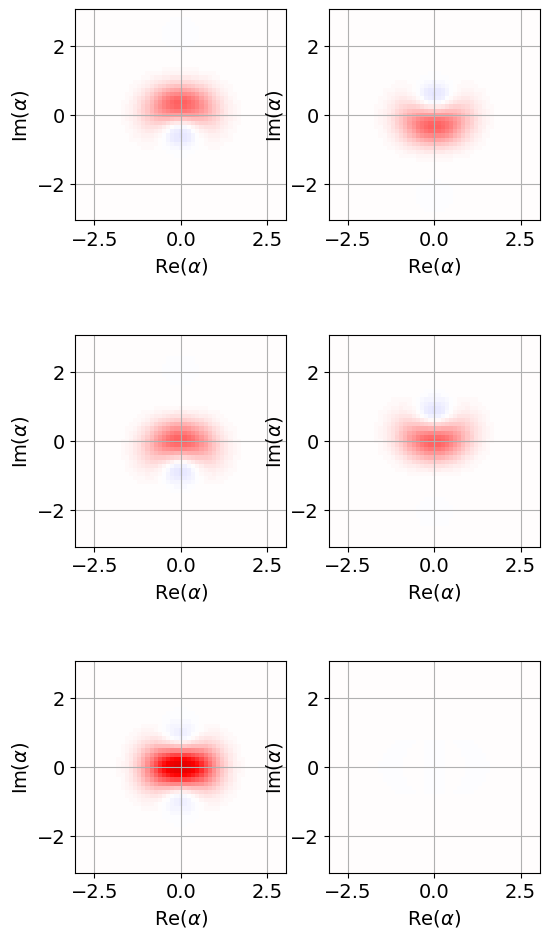

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [165]:
fig, axs = plt.subplots(3, 2, figsize=(6, 12))
plot_wigner(i_plus_proj_tensor*psis[0], ax=axs[0,0])
plot_wigner(i_minus_proj_tensor*psis[0], ax=axs[0,1])
plot_wigner(i_plus_proj_tensor*psis[1], ax=axs[1,0])
plot_wigner(i_minus_proj_tensor*psis[1], ax=axs[1,1])
plot_wigner((g_proj_tensor )*psis[1], ax=axs[2,0])
plot_wigner((e_proj_tensor)*psis[1], ax=axs[2,1])

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(6, 12))
plot_wigner(g_proj_tensor*psis[0], ax=axs[0,0])
plot_wigner(e_proj_tensor*psis[0], ax=axs[0,1])
plot_wigner(g_proj_tensor*psis[1], ax=axs[1,0])
plot_wigner(e_proj_tensor *psis[1], ax=axs[1,1])
plot_wigner((g_proj_tensor + e_proj_tensor)*psis[0], ax=axs[2,0])
plot_wigner((g_proj_tensor -1j* e_proj_tensor)*psis[0], ax=axs[2,1])


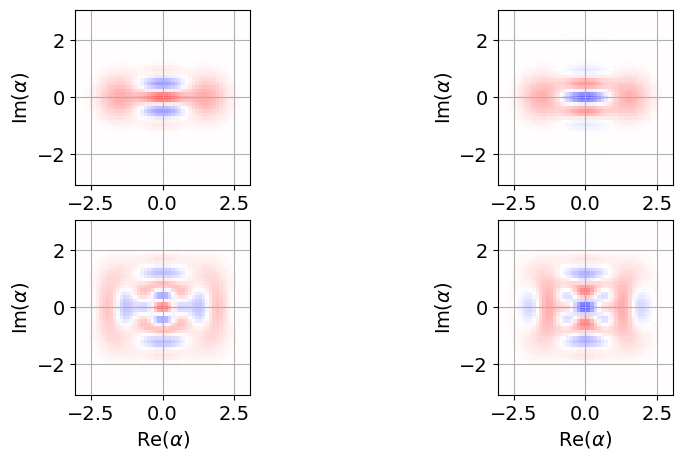

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [172]:
disp = 3
cat = -np.pi/(2*disp)
squ = -disp*2/np.pi
uv1 = [ disp, squ]
psis = squeezingStateOneStep(uv1)


fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plot_wigner(g_proj_tensor*psis[0], ax=axs[0,0])
plot_wigner(e_proj_tensor*psis[0], ax=axs[0,1])
plot_wigner(g_proj_tensor*psis[1], ax=axs[1,0])
plot_wigner(e_proj_tensor*psis[1], ax=axs[1,1])

In [70]:


def get_state(alpha, beta):
    global_phase = np.exp(1j*alpha*beta/4)/np.sqrt(2)
    first = 1/np.sqrt(2)*tensor(fock(2,0),coherent(N,alpha/2-1j*beta/2))*np.exp(-1j*alpha*beta/2)

    second = 1/np.sqrt(2)*tensor(fock(2,1),coherent(N,alpha/2+1j*beta/2))

    third = 1j/np.sqrt(2)*tensor(fock(2,0),coherent(N,-alpha/2-1j*beta/2))

    forth = -1j/np.sqrt(2)*tensor(fock(2,1),coherent(N,-alpha/2+1j*beta/2))*np.exp(-1j*alpha*beta/2)
    return global_phase*(first+second+third+forth)

In [63]:
-np.pi/(2*disp)

-0.5235987755982988

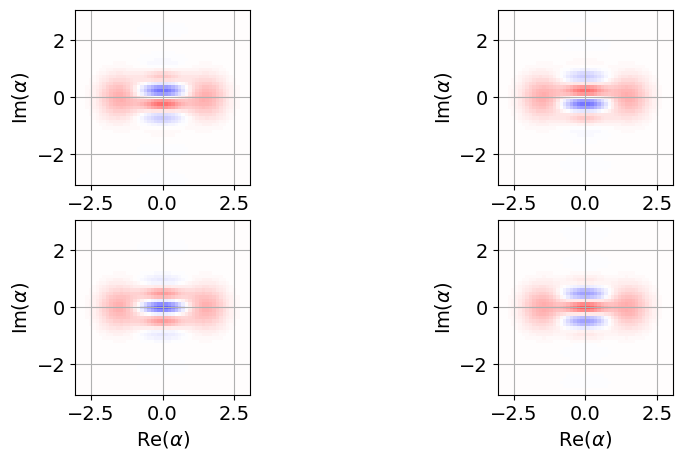

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [73]:
alpha = 3
beta = -0
state = get_state(alpha,beta)
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plot_wigner(g_proj_tensor*state, ax=axs[0,0])
plot_wigner(e_proj_tensor*state, ax=axs[0,1])
plot_wigner(i_plus_proj_tensor*state, ax=axs[1,0])
plot_wigner(i_minus_proj_tensor*state, ax=axs[1,1])

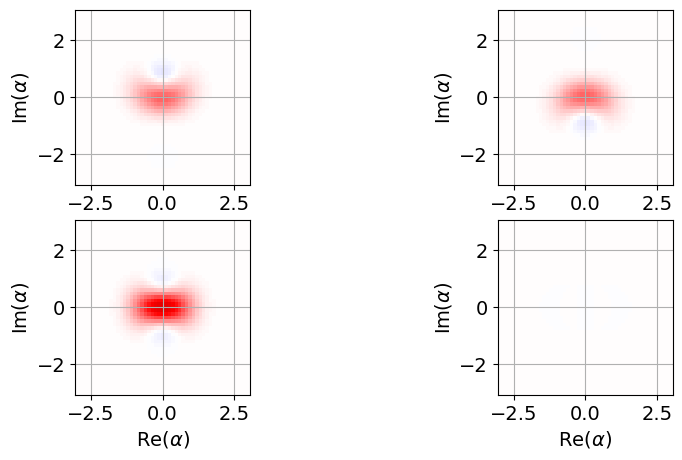

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [162]:
alpha = 1
beta = -0.6
state = get_state(alpha,beta)
Rx = tensor(rx(-np.pi/2),qeye(N))
fig, axs = plt.subplots(2
                        , 2, figsize=(10, 5))
plot_wigner(g_proj_tensor*state, ax=axs[0,0])
plot_wigner(e_proj_tensor*state, ax=axs[0,1])
plot_wigner(g_proj_tensor*(Rx*state), ax=axs[1,0])

plot_wigner(e_proj_tensor*(Rx*state), ax=axs[1,1])

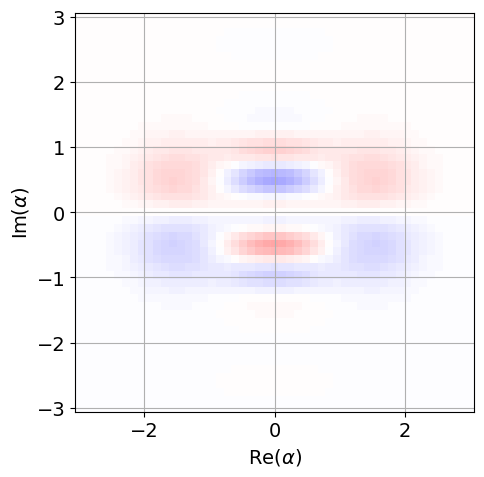

In [144]:
plot_wigner((g_proj_tensor*state).ptrace(1) - (e_proj_tensor*state).ptrace(1))

In [158]:
state = Rx*tensor(i_plus,(coherent(N,alpha/2)-coherent(N,-alpha/2)).unit())

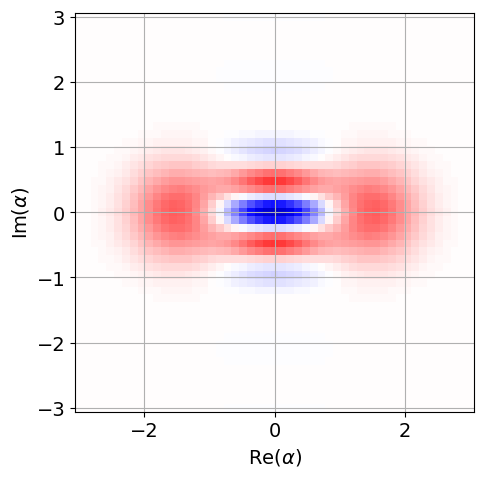

In [161]:
plot_wigner(state)